In [ ]:
import pandas as pd
from google.colab import files
import io
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
from shapely.geometry import Point

In [ ]:
uploaded = files.upload()
df = pd.read_csv('/content/working_data_1.csv')
df.head(5)

Saving working_data_1.csv to working_data_1.csv


,publication_number,cpc_code,loc_longitude,loc_latitude,year
0,DE-24-C,A47G21/165,9.172030,48.767792,1877
1,DE-1037-C,"C10B53/02,Y02E50/14",14.724856,50.655670,1877
2,DE-1003-C,A63D15/16,-100.873290,21.974831,1877
3,DE-1158-C,A47J17/16,8.605990,50.124378,1877
4,DE-215-C,A45B21/00,151.202610,-33.948193,1877


In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/German_Union (GER)_1870_v.1.0.shp'
map1 = gpd.read_file(shapefile_path)

Saving map_prussia_1870.zip to map_prussia_1870 (1).zip


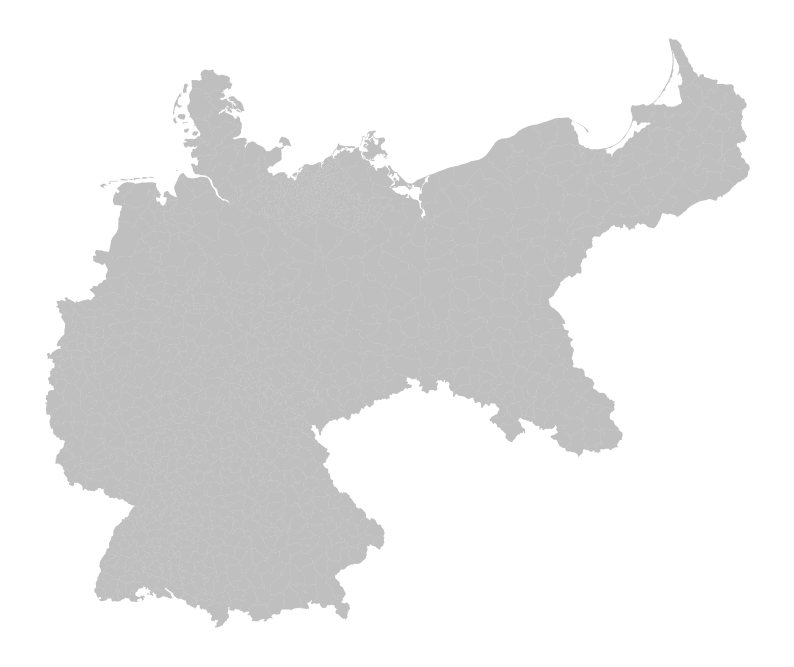

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

# Plot map1 as the background
map1.plot(ax=ax, alpha=0.5, color="gray")

plt.show()

In [ ]:
df_copy = df.copy()
geometry = [Point(xy) for xy in zip(df_copy['loc_longitude'], df_copy['loc_latitude'])]
geo_df = gpd.GeoDataFrame(df_copy, geometry=geometry)
geo_df = geo_df.set_crs(epsg=4326)
map1 = map1.to_crs(geo_df.crs)

In [ ]:
uploaded = files.upload()
zip_file_name = list(uploaded.keys())[0]
zip_content = uploaded[zip_file_name]

with zipfile.ZipFile(io.BytesIO(zip_content), 'r') as zip_ref:
    temp_dir = '/content/temp_extract'
    zip_ref.extractall(temp_dir)

shapefile_path = f'{temp_dir}/railways.shp'
gdfRails = gpd.read_file(shapefile_path)

Saving railways.zip to railways.zip


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


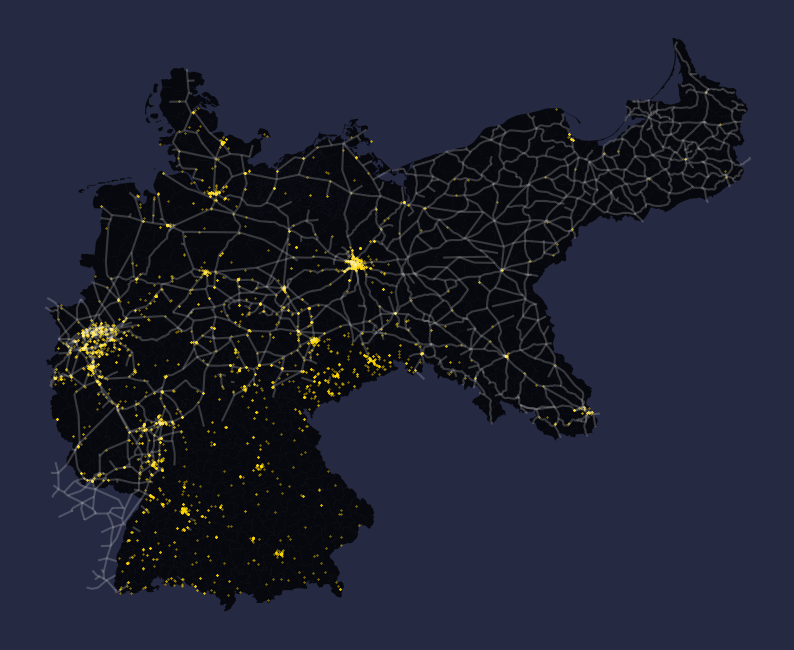

In [ ]:
geo_df_within_map1 = gpd.sjoin(geo_df, map1, op='within')
gdfRails = gdfRails.set_crs(epsg=4326)
gdfRails_within_map1 = gpd.sjoin(gdfRails, map1, op='within')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

hex_color = '#252941'
rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
fig.patch.set_facecolor(rgb_color)

# Turn off the axis
ax.axis('off')

# Plot map1 and filtered gdfPlaces with pink color
map1.plot(ax=ax, alpha=0.8, color="black")
geo_df_within_map1[geo_df_within_map1['year'] == 1920].plot(ax=ax, alpha=1, color="gold", markersize=0.1)
gdfRails[(gdfRails['opening'] < 1920)].plot(ax=ax, alpha=0.2, color="white", markersize=0.01)

# Show the plot
plt.show()

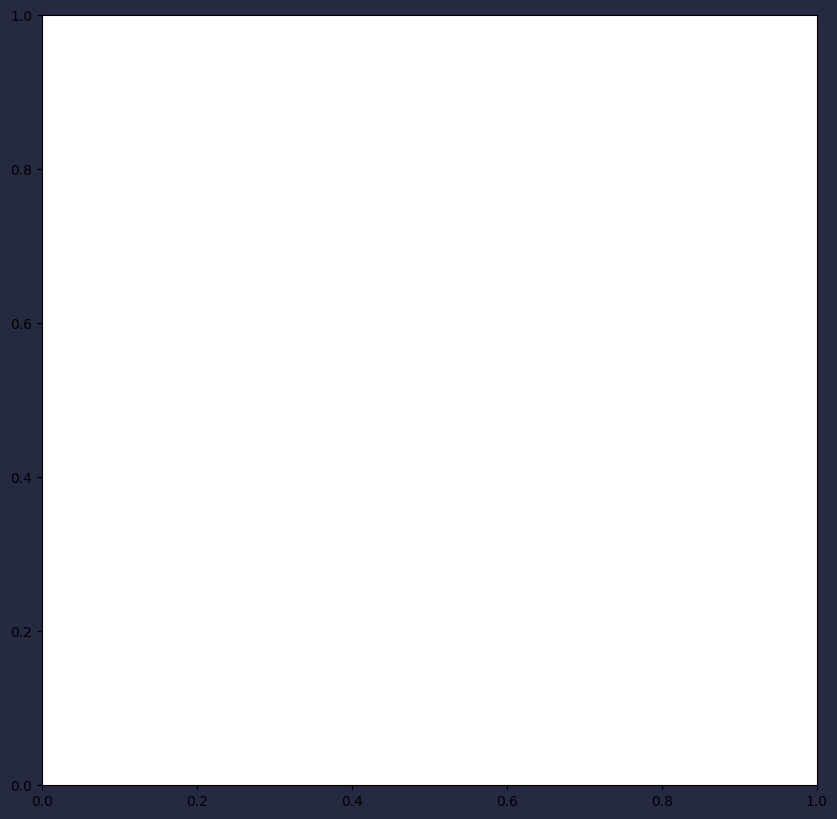

<Figure size 640x480 with 0 Axes>

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Ensure 'map1' and 'geo_df_within_map1' are defined as in your previous setup

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Set the figure background color
hex_color = '#252941'
rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
fig.patch.set_facecolor(rgb_color)

# Function to update the plot for each frame
def update(year):
    ax.clear()  # Clear previous frame
    ax.axis('off')  # Turn off the axis
    map1.plot(ax=ax, alpha=0.8, color="black")  # Plot map boundaries
    # Plot points for the current year
    geo_df_within_map1[geo_df_within_map1['year'] == year].plot(ax=ax, alpha=1, color="gold", markersize=0.05)
    gdfRails[(gdfRails['opening'] < year)].plot(ax=ax, alpha=0.2, color="white", markersize=0.01)
    ax.text(0.01, 0.99, str(year), transform=ax.transAxes, color="gold", fontsize=15, verticalalignment='top')

# Create the animation
ani = FuncAnimation(fig, update, frames=range(1877, 1930), repeat=False)

# Display the animation
plt.show()

# To save the animation, you can use:
ani.save('animation.gif', writer='imagemagick', fps=2)


In [ ]:
gdfRails.head()

,id,opening,comment,opening_d,loc_exact,gauge,closing,geometry
0,None,1852.0,Elbing-Braunsberg,19.10.1852,1.0,None,2012.0,"LINESTRING (19.84215 54.38095, 19.84324 54.378..."
1,None,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,None,1945.0,"LINESTRING (19.93482 54.46413, 19.92202 54.458..."
2,None,1853.0,Braunsberg-Königsberg,02.08.1853,1.0,None,NaN,"LINESTRING (20.49867 54.69327, 20.49274 54.695..."
3,None,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,None,NaN,"LINESTRING (21.06883 54.63585, 21.05758 54.634..."
4,None,1860.0,Königsberg-Eydtkuhnen,06.06.1860,1.0,None,NaN,"LINESTRING (21.21488 54.61492, 21.18584 54.617..."


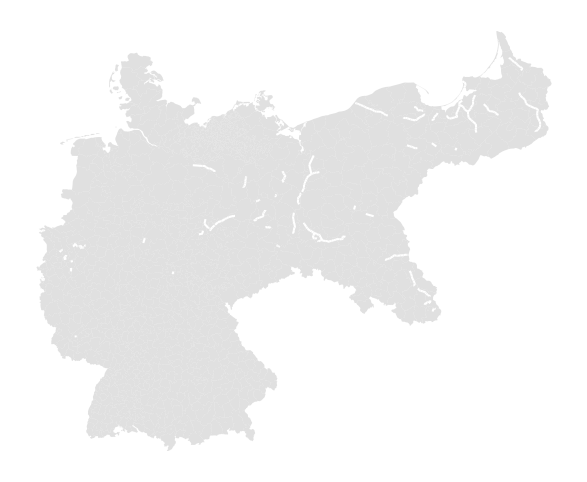

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure 'map1', 'gdfRails', and 'gdfPlaces' are defined, and 'map1' is already reprojected to match 'gdfRails' CRS

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Turn off the axis
ax.axis('off')

# Directly filter and plot gdfRails where 'opening' is after 1887 and 'closing' is after 1888
gdfRails[(gdfRails['opening'] < 1887) & (gdfRails['closing'] > 1888)].plot(ax=ax, alpha=1, color="white", markersize=1)

# Plot map1 with gdfRails as the background
map1.plot(ax=ax, alpha=0.7, color="lightgray")

# If you also need to plot gdfPlaces, ensure it's defined and use a similar plot call
# gdfPlaces.plot(ax=ax, ...)

# Show the plot
plt.show()
